I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^ {\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

In [33]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.optimize as optimize
import pandas as pd
import random

In [7]:
α = m.radians(float(input("Ingrese el ángulo α: ")))
l = float(input("Ingrese la longitud l: "))


def f(x):
    T = (2*(2*l/9.8)**0.5)*((np.cos(x)-np.cos(α))**0.5)**-1
    return T


Ingrese el ángulo α: 90
Ingrese la longitud l: 2


<ipython-input-7-9dcea8c7866f>:6: RuntimeWarning: invalid value encountered in sqrt
  T = (2*(2*l/9.8)**0.5)*((np.cos(x)-np.cos(α))**0.5)**-1


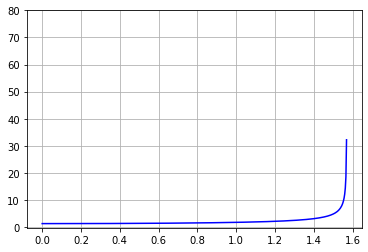

In [14]:
θ = np.linspace(0,2*α,1000)

plt.plot(θ,f(θ),'b-')
plt.ylim(top=80)
plt.grid()
plt.show()

Como podemos ver ésta es una función cuenta con una asíntota en f(α). Como la función no es continua en el intervalo $[0 , α]$ no se puede integrar

In [20]:
#Usando las funciones de la clase.

def T0(l,g=9.80665):
    return 2*np.pi*np.sqrt(l/g)


def T(Φ,l=1,g=9.80665):
    k=np.sin(Φ/2)
    return (2*T0(l,g)/np.pi)*integrate.quad(lambda u:(1)/(np.sqrt(1-k**2*np.sin(u)**2)),0,np.pi/2)[0]

#vectorizando para poder evaluarla en más puntos

Tv=np.vectorize(T)

numpy.vectorize

In [27]:
Λ = np.linspace(m.radians(0),m.radians(90),90)
x = np.linspace(0,90,90)

Rat = Tv(Λ)/T0(l)

d = {'T/T0': Rat, 'Angulos en radianes': Λ, 'Ángulos en grados' : x}
df = pd.DataFrame(data=d)
df

,T/T0,Angulos en radianes,Ángulos en grados
0,0.707107,0.000000,0.000000
1,0.707121,0.017649,1.011236
2,0.707162,0.035299,2.022472
3,0.707231,0.052948,3.033708
4,0.707327,0.070598,4.044944
...,...,...,...
85,0.821671,1.500199,85.955056
86,0.824817,1.517848,86.966292
87,0.828024,1.535498,87.977528
88,0.831294,1.553147,88.988764


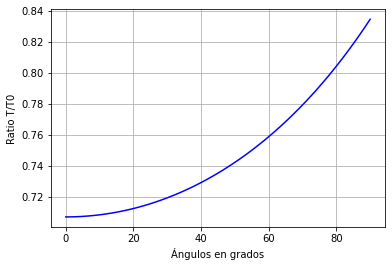

In [73]:
plt.plot(df['Ángulos en grados'],df['T/T0'],'b-')
plt.ylabel('Ratio T/T0')
plt.xlabel('Ángulos en grados')
plt.grid()
plt.show()

In [31]:
#Análisis 𝛼=0

T(0)

2.0064092925890407

II) 
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions

$R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$.
$U$ is a diagonalization matrix with mixing angle $\pi/4$


2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

In [53]:
#Subpunto I

np.random.seed(1020462281) #Semilla para generar número aleatorio

θ = np.random.uniform(m.radians(0),m.radians(360)) #Generación del ángulo aleatorio.  
pi4 = m.radians(45)


In [62]:
R = ([[np.cos(θ),np.sin(θ)],
     [-np.sin(θ),np.cos(θ)]]) #Matríz R generada con aleatoriedad

U = ([[np.cos(pi4),np.sin(pi4)],
     [-np.sin(pi4),np.cos(pi4)]]) #Matríz U

D = np.sqrt(np.diag([2,4])) #Matriz de Eigenvectores

U

[[0.7071067811865476, 0.7071067811865476],
 [-0.7071067811865476, 0.7071067811865476]]

In [64]:
Ut= np.transpose(U)

Y = np.dot(np.dot(R,D),Ut) #Realizando la multiplicación UDU^t
Y

array([[1.69019793, 0.20658504],
       [0.37845868, 1.71968678]])

In [72]:
#Subpunto II

#La matríz A se genera multiplicando YY^t

A = np.dot(Y,np.transpose(Y))

#Ahora, los eigenvalores y eigenvectores corresponden a:

λ , V = np.linalg.eig(A)

print("El valor de los eigenvalores es \n{}. \n La matríz cuyas columnas son los eigenvectores es \n {}" .format(λ,V))

El valor de los eigenvalores es 
[2. 4.]. 
 La matríz cuyas columnas son los eigenvectores es 
 [[-0.74180644 -0.67061405]
 [ 0.67061405 -0.74180644]]
